## Author: Xiang (Albert) Li
## USC ID: 1892796881
## Github Userid: XiangLi1209
## Created Time: Feb 5th, 2023

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import math
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools
import copy

## 1. Combined Cycle Power Plant Data Set

### The dataset contains data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

#### (a) Download the Combined Cycle Power Plant data1 from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [2]:
pp=pd.read_excel('../data/Folds5x2_pp.xlsx') #This would only load the first sheet of the file, as required by hw2
pp.head() #Have a basic understanding of the dataset

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


#### (b) Exploring the data: 
#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

In [3]:
pp.shape

(9568, 5)

###  <span style='color:blue '> From the return(9568,5), we can see that there are 9568 rows and 5 columns in the dataset </span>
###  <span style='color:blue '> For each row, there is represents an hourly average input point, as for each column, according to UCI ML Repository:</span>
###  <span style='color:blue '>AT: Average Temperature range 1.81°C and 37.11°C; </span>
###  <span style='color:blue '>V: Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg; </span>
###  <span style='color:blue '>AP: Ambient Pressure (AP) in the range 992.89-1033.30 milibar; </span>
###  <span style='color:blue '>RH: Relative Humidity in the range 25.56% to 100.16%;</span>
###  <span style='color:blue '>PE: Net hourly electrical energy output 420.26-495.76 MW. This is also the parameter that we need to predict</span>

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

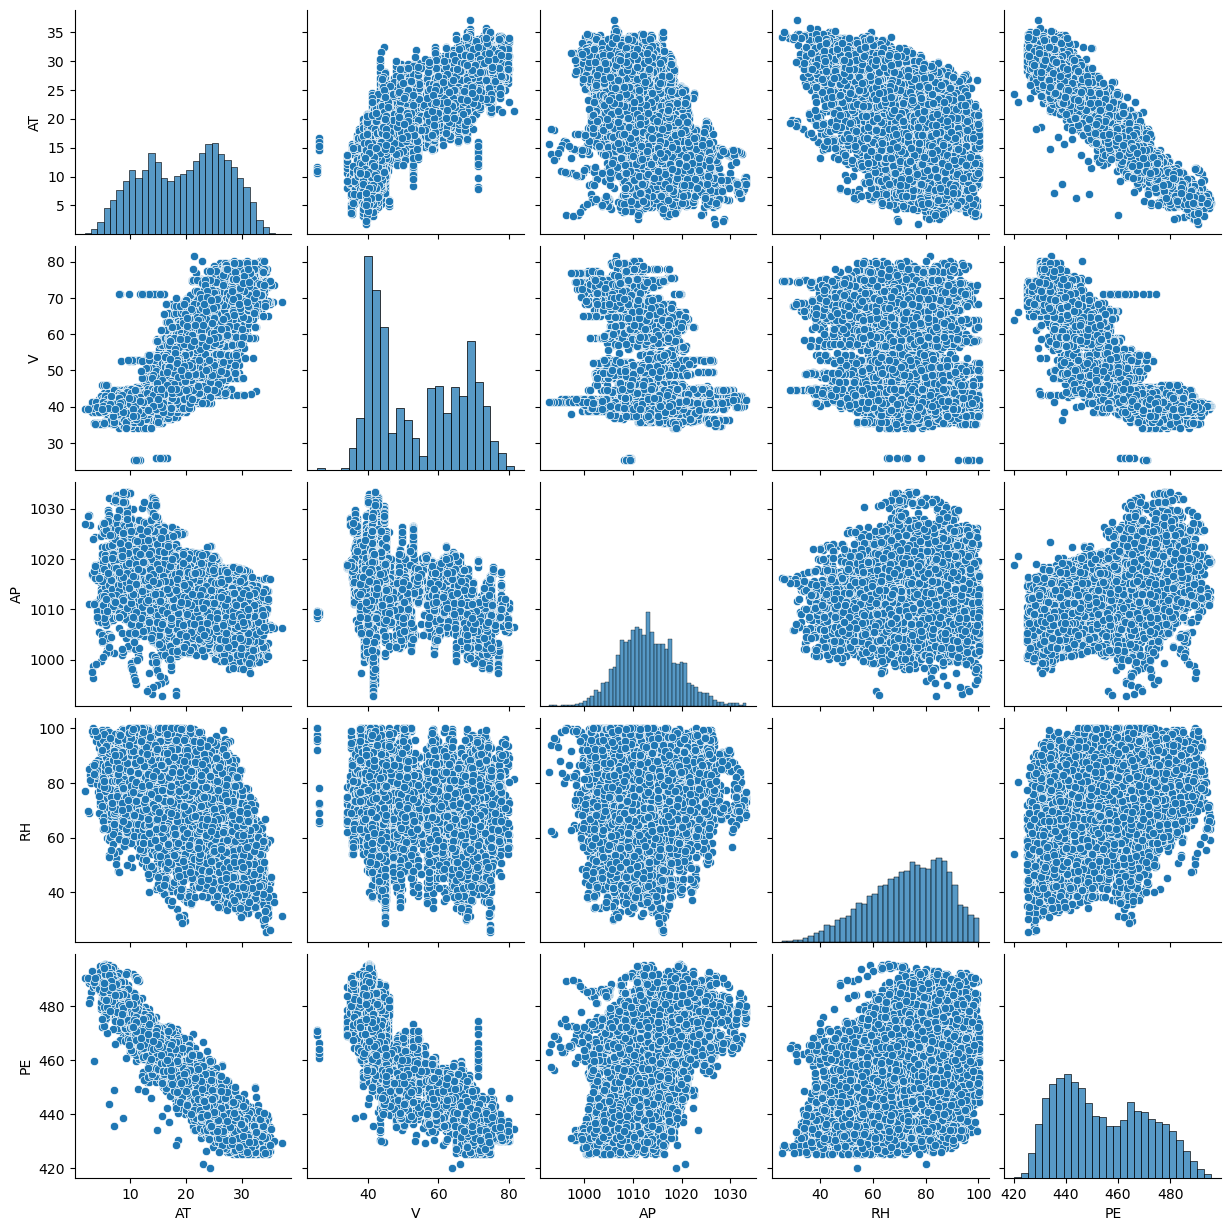

In [4]:
sns.pairplot(pp) 

###  <span style='color:blue '> All values are numeric values. The distribution for V isn't as normal as other variables. </span>
###  <span style='color:blue '> In terms of relationship between variables and PE, we can see that AT has a clear linear relationship with PE, whie V is more exponential. As for AP and RH, the relationship is less clear.</span>


#### iii. What are the mean, the median, range,  first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [5]:
# Compute the mean, median, and range of each variable
mean = pp.mean()
median = pp.median()
rng = pp.max() - pp.min()

# Compute the quartiles and interquartile range of each variable
q1 = pp.quantile(0.25)
q3 = pp.quantile(0.75)
iqt = q3 - q1

# Make a table to summarize all statistic values
table = pd.concat([mean,median,rng,q1,q3,iqt],axis=1)
table.columns=['mean','median','rng','q1','q3','iqt']
table

,mean,median,rng,q1,q3,iqt
AT,19.651231,20.345,35.30,13.5100,25.72,12.2100
V,54.305804,52.080,56.20,41.7400,66.54,24.8000
AP,1013.259078,1012.940,40.41,1009.1000,1017.26,8.1600
RH,73.308978,74.975,74.60,63.3275,84.83,21.5025
PE,454.365009,451.550,75.50,439.7500,468.43,28.6800


#### (c) For each predictor,  fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

In [6]:
trymod = sm.OLS(pp['PE'],pp[['V']]).fit()
trymod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     PE   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.318e+05
Date:                Fri, 10 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:31:42   Log-Likelihood:                         -59245.
No. Observations:                9568   AIC:                                  1.185e+05
Df Residuals:                    9567   BIC:                                  1.185e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V              7.8718      0.022    363.069      0.000       7.829       7.914
==============================================================================
Omnibus:                    66054.809   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.586
Skew:                          -0.148   Prob(JB):                    3.02e-193
Kurtosis:                       1.538   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

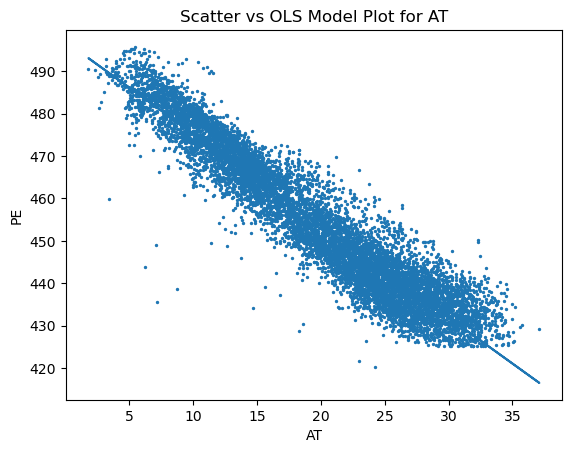

/Users/alberli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


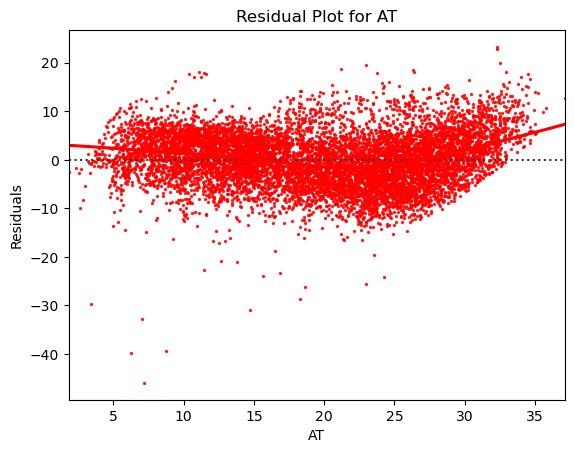

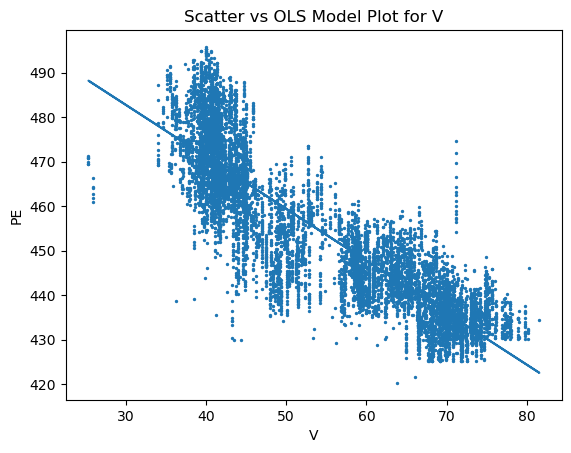

/Users/alberli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


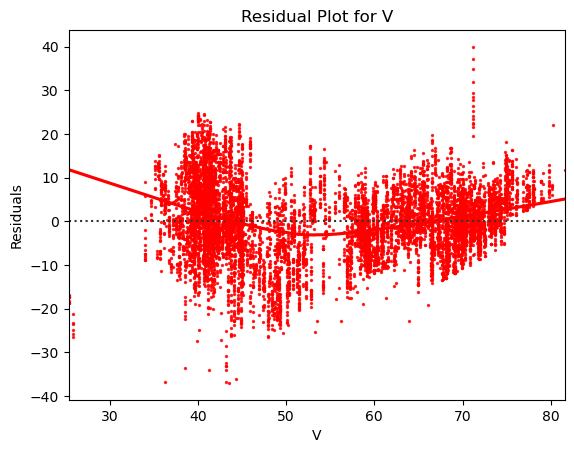

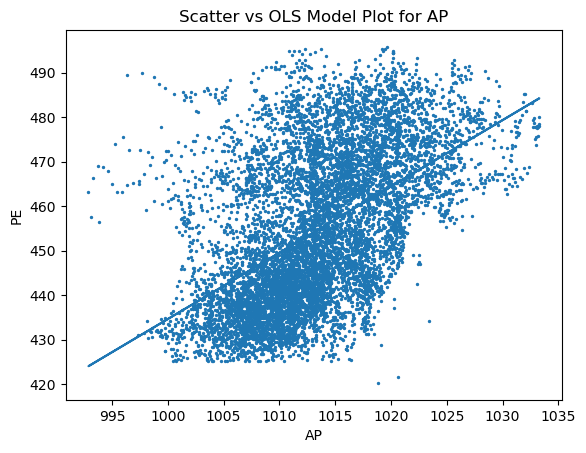

/Users/alberli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


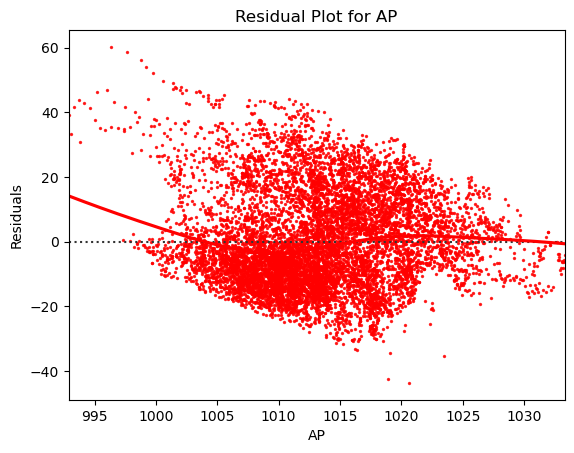

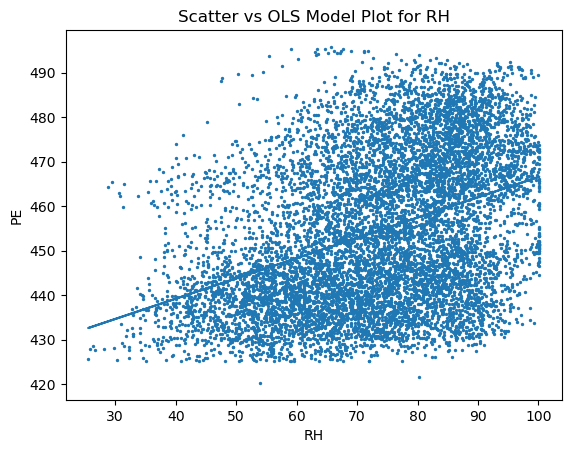

/Users/alberli/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


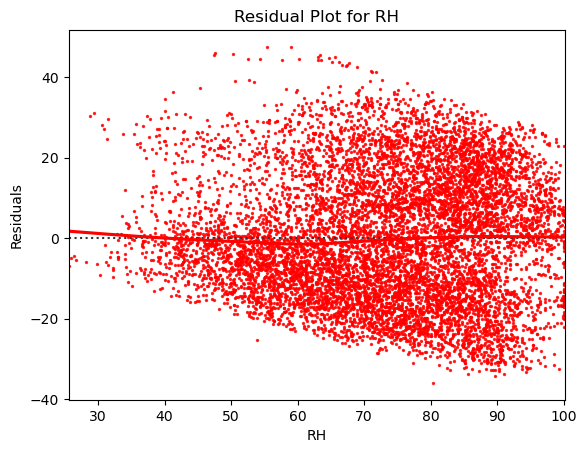

In [7]:
# Initialize the parameter
models = {}
var = pp.columns[:4]

# Fit a linear regression model for each variable within a for-loop
for column in var:
    X = pp[[column]]
    y = pp['PE']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    models[column] = model
    
    # Plot a simple scatter plot with the fitted model for each variable
    plt.scatter(pp[column], y, label=column,s=2)
    plt.plot(pp[column], model.predict(X))
    plt.xlabel(column)
    plt.ylabel("PE")
    plt.title("Scatter vs OLS Model Plot for " + column)
    plt.show()
    # Plot the residuals for exploratory purpose
    sns.residplot(pp[column], y, lowess=True,color='red',scatter_kws={'s':2})
    plt.xlabel(column)
    plt.ylabel("Residuals")
    plt.title("Residual Plot for " + column)
    plt.show()

In [8]:
influence = models['V'].get_influence()
cooks_distance,pvals=influence.cooks_distance
outliers=np.where(pvals<0.05)
print((pvals))


[0.99995171 0.99999999 0.99950681 ... 0.99999494 0.99999844 0.99992432]


###  <span style='color:blue '> The outlier information for each predictors is listed below from the output <span>

In [9]:
result = {}
for i in var:
    result[i] = models[i].outlier_test(method='bonf',alpha=0.05)
    print('there are', sum((1-result[i]['bonf(p)'])>0.05),'outliers in',i)

there are 16 outliers in AT
there are 12 outliers in V
there are 2 outliers in AP
there are 0 outliers in RH


###  <span style='color:blue '> AT vs PE has a clear linear relationship and is captured by the OLS model and the residual plot looks normal; </span>
###  <span style='color:blue '> V vs PE has a more exponential relationship and is partially captured by the OLS model with possible extreme values at V ~ 70, while the residul plot, being a rough fan shape, suggesting minor heteroscedasticity issue; </span>
###  <span style='color:blue '>AP vs PE has a somewhat linear relationship and is captured by the OLS model, and the residual plot looks normal; </span>
###  <span style='color:blue '>RH vs PE has little relationship from the scatter plot, but the residual plot looks normal. </span>

In [10]:
# Print the summary of each model
for column, model in models.items():
    print("Variable:", column)
    print(model.summary())

Variable: AT
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:40   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        497.0341      0.156   3177

###  <span style='color:blue '>  These four summary reports suggest that all four variables are statistically significant with p is approaximately 0 But the R-squared value for both AP & RH are quite low (lower than 0.3), which is consistant with the scatterplot.</span>

#### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis $H_0$ :  $\beta_j$= 0?

In [11]:
# Fit a multiple linear regression model
X_all = pp[pp.columns[:-1]]
X_all = sm.add_constant(X_all)
y = pp['PE']
mod_all = sm.OLS(y, X_all).fit()
mod_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:40   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  <span style='color:blue '> Since all p-val are smaller than 0.05, we can reject the null hypothesis for all predictors. <span>

#### (e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coeficients from 1c on the x-axis, and the multiple regression coeficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coeficient in a simple linear regression model is shown on the x-axis, and its coeficient estimate in the multiple linear regression model is shown on the y-axis.

In [12]:
coef_c = []

for i in var:
    coef_c.append(models[i].params[1])
print('coef_c is:',coef_c)

coef_d=[]
for i in range(1,5,1):
    coef_d.append(mod_all.params[i])
print('coef_d is:', coef_d)
c = ['red','orange','g','b']
legend_list = ['AT','V','AP','RH']

coef_c is: [-2.1713199585178, -1.1681351265557125, 1.4898716733991129, 0.4556501022629798]
coef_d is: [-1.9775131066353928, -0.23391642258249976, 0.062082943780849, -0.15805410291641292]


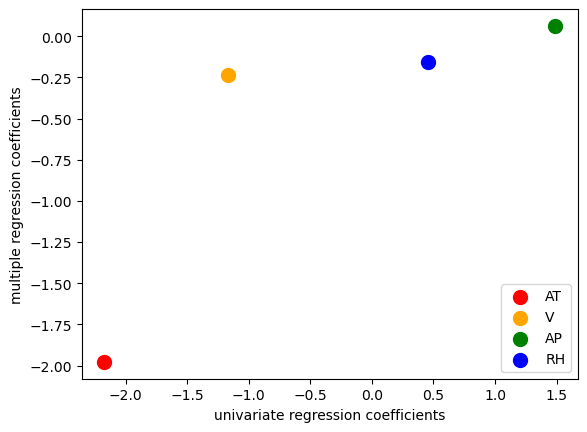

In [13]:

for i in range(4):
    plt.scatter(coef_c[i],coef_d[i],color = c[i],marker='o',s=100)
    plt.xlabel('univariate regression coefficients')
    plt.ylabel('multiple regression coefficients')
    #plt.legend(legend_list[i])
# Adding a diagnoal abline as reference, if the point is on the line, meaning they share the same value. 
# If on the left, then multiple regression coefficients are larger. And vise versa.
plt.legend(['AT','V','AP','RH'], loc='lower right')
plt.show()

###  <span style='color:blue '> The p-values are still very small, meaning all predictors are all still statistically significant. However, the R-squared = 0.929 for 1d model represents a much stronger prediction than the that of 1c. In terms of the coefficients, the univariant coefficients are larger than that of the multivariable, which is reasonable given the correlations among predictors. </span>


#### (f)Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X,  fit a model of the $form^2$
\begin{align*}
    Y &= \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + e
\end{align*}


In [14]:
# Trial for just AT
polynomial_features= PolynomialFeatures(degree=3)
X_AT3 = polynomial_features.fit_transform(pp[['AT']])
X_AT3 = sm.add_constant(X_AT3)
y = pp['PE']
model_AT3 = sm.OLS(y, X_AT3).fit()
model_AT3.summary()
# Different value from the summary table below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003
==============================================================================
Omnibus:                      648.041   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2767.059
Skew:                          -0.191   Prob(JB):                         0.00
Kurtosis:                       5.607   Cond. No.                     1.90e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
# Initialize the parameter
models_3 = {}
var = pp.columns[:4]
polynomial_features = PolynomialFeatures(degree=3)
y = pp['PE']

# Fit a linear regression model for each variable within a for-loop
for column in var:
    X3 = polynomial_features.fit_transform(pp[[column]])
    X3 = sm.add_constant(X3)
    model_3 = sm.OLS(y, X3).fit()
    models_3[column] = model_3

for column, model in models_3.items():
    print('The summary for',column,'model is: ',models_3[column].summary())

The summary for AT model is:                              OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281 

###  <span style='color:blue '>  Given the small p-value for the non-linear terms (x2 and x3 in the summary table), we can conclude that all predictors have non-linear association with the response. </span>

#### (g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.

In [16]:
#Create a list of pairwise interaction terms and add that into the column
interactions = list(itertools.combinations(var,2))
pp_g = copy.deepcopy(pp)
for i in interactions:
    name = i[0] + '&' + i[1]
    pp_g[name] = pp_g[i[0]]*pp_g[i[1]]
    
var_g = [col for col in pp_g.columns if col!='PE']
print(var_g)
x_g = sm.add_constant(pp_g[var_g]) #Adding the constant term
mod_g = sm.OLS(pp_g['PE'],x_g).fit()

print(mod_g.summary())

['AT', 'V', 'AP', 'RH', 'AT&V', 'AT&AP', 'AT&RH', 'V&AP', 'V&RH', 'AP&RH']
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

###  <span style='color:blue '> From the summary table, we can see that all interaction terms have statistically significant small p-vale except the one of V&RH = 0.086. Thus, there are evidence of association of interactions of predictors with response. </span>

#### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.

In [17]:
# train on 70% of the data with all predictors
pp_h = copy.deepcopy(pp)
X_h = pp_h.drop('PE',axis=1)
X_h = sm.add_constant(X_h)
y = pp_h['PE']
x_train_h1,x_test_h1,y_train_h1,y_test_h1 = train_test_split(X_h,y,test_size = 0.3,random_state = 40)
mod_h1=sm.OLS(y_train_h1,x_train_h1).fit() 
print(mod_h1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.209e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:                -19604.
No. Observations:                6697   AIC:                         3.922e+04
Df Residuals:                    6692   BIC:                         3.925e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        441.9597     11.502     38.426      0.0

In [18]:
# all possible interaction terms and quadratic nonlinearities
pp_h_2 = copy.deepcopy(pp)

# Adding interaction terms like part g
interactions = list(itertools.combinations(var,2))
for i in interactions:
    name = i[0] + '&' + i[1]
    pp_h_2[name] = pp_h_2[i[0]]*pp_h_2[i[1]]

# Adding quadratic terms
for col in var:
    pp_h_2[col + '_sq'] = np.power(pp_h_2[col],2)

X_h2 = pp_h_2.drop('PE',axis=1)
y=pp_h['PE']
x_train_h2,x_test_h2,y_train_h2,y_test_h2 = train_test_split(X_h2,y,test_size = 0.3,random_state = 40)
x_train_h2 = sm.add_constant(x_train_h2)
mod_h2 = sm.OLS(y_train_h2,x_train_h2).fit()
print(mod_h2.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7291.
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:                -19147.
No. Observations:                6697   AIC:                         3.832e+04
Df Residuals:                    6682   BIC:                         3.843e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5954.2606   1432.135     -4.158      0.0

###  <span style='color:blue '>  From the summary table's p-val, we can see that V, V&AP, V&RH, V_sq are very large, with the  AP&RH on the boarderline (0.057). Thus, we can try mod_h3 without these predictors. However, since the AT&V is significant, we should still keep the V predictor.  </span>

In [19]:
pp_h3 = copy.deepcopy(pp_h_2)
pp_h3.columns

pp_h3 = pp_h3.drop(columns=['V_sq','V&AP','V&RH','AP&RH'])
pp_h3.head()
X_h3 = pp_h3.drop('PE',axis = 1)
y = pp_h3['PE']
x_train_h3,x_test_h3,y_train_h3,y_test_h3 = train_test_split(X_h3,y,test_size = 0.3,random_state = 40)
x_train_h3 = sm.add_constant(x_train_h3)
mod_h3 = sm.OLS(y_train_h3,x_train_h3).fit()
print(mod_h3.summary())
# From this new summary table, we can see that all predictors are statistically significant.

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 1.019e+04
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:36:41   Log-Likelihood:                -19154.
No. Observations:                6697   AIC:                         3.833e+04
Df Residuals:                    6686   BIC:                         3.841e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3867.4119   1301.379     -2.972      0.0

In [20]:
# Make predictions based on the mod_h and mod_h3 based on their corresponding test dataset
x_test_h1 = sm.add_constant(x_test_h1)
x_test_h3 = sm.add_constant(x_test_h3)

y_h1 = mod_h1.predict(x_test_h1)
y_h3 = mod_h3.predict(x_test_h3)

mse_h = mean_squared_error(y_test_h1, y_h1)
mse_h3 = mean_squared_error(y_test_h3, y_h3)

print(mse_h,mse_h3)

21.60588240522413 18.860772199276553


###  <span style='color:blue '> From the MSE value, we can see that mod_h3, which includes all predictors, statistically significant interactions and quadratic terms is better than the mod_h1, which only have all predictors. </span>

#### (i) KNN Regression:  Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k $k \in \{1,2,...100\}$that gives you the best  fit. Plot the train and test errors in terms of 1/k.

In [21]:
k_list = [i for i in range(1,101,1)]
# On the raw features using the same train and test data splitted in the h and on normalized data in the same for loop
test_error_raw = []
train_error_raw = []
train_error_norm = []
test_error_norm = []

# Normalized data
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train_h1)
x_test_norm = scaler.transform(x_test_h1)

for k in k_list:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train_h1,y_train_h1)
    train_pred_raw = knn.predict(x_train_h1)
    test_pred_raw = knn.predict(x_test_h1)
    test_error_raw.append(mean_squared_error(y_test_h1, test_pred_raw))
    train_error_raw.append(mean_squared_error(y_train_h1, train_pred_raw))
    # for noramlized data
    knn.fit(x_train_norm,y_train_h1)
    train_pred_norm = knn.predict(x_train_norm)
    test_pred_norm = knn.predict(x_test_norm)
    test_error_norm.append(mean_squared_error(y_test_h1, test_pred_norm))
    train_error_norm.append(mean_squared_error(y_train_h1, train_pred_norm))

In [22]:
print(min(test_error_norm),
min(test_error_raw))

best_k_norm = k_list[test_error_norm.index(min(test_error_norm))]
best_k_raw = k_list[test_error_raw.index(min(test_error_raw))]
print('best k for norm dataset is:',best_k_norm, 
      'best k for raw dataset is:',best_k_raw)

15.045765663096484 16.739065959402456
best k for norm dataset is: 4 best k for raw dataset is: 6


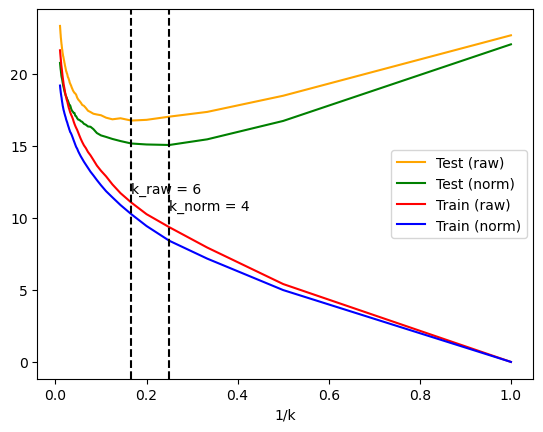

In [23]:
# make the 1/k v.s train & test error for both raw & normalized features plot
k_inv = [1/i for i in range(1,101,1)]
plt.plot(k_inv, test_error_raw, label = 'Test (raw)',color = 'orange')
plt.plot(k_inv, test_error_norm, label = 'Test (norm)',color = 'green')
plt.plot(k_inv, train_error_raw, label='Train (raw)',color = 'red')
plt.plot(k_inv, train_error_norm, label='Train (norm)',color = 'blue')
plt.xlabel('1/k')
plt.legend()
plt.axvline(x=1/best_k_norm, color='black', linestyle='--')
plt.text(1/best_k_norm, 0.7*np.min(test_error_norm), 'k_norm = {}'.format(best_k_norm), rotation=0)
plt.axvline(x=1/best_k_raw, color='black', linestyle='--')
plt.text(1/best_k_raw, 0.7*np.min(test_error_raw), 'k_raw = {}'.format(best_k_raw), rotation=0)
plt.show()

###  <span style='color:blue '> From the plot, we can see that the optimal k for based on the raw dataset's test error is 6 with 16.739065959402456; and it's 4 for normalized data with error 15.045765663096484. </span>

#### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

### <span style = 'color:blue'> One of the lowest error I achieved with linear regression is 18.860772199276553, while it's 15.045765663096484 for KNN models. Thus, it is safe to say that KNN with normalized dataset has the smallest test error.</span>
### <span style = 'color:blue'> Some potential reasons for this including: KNN doens't require linear relationship between predictors and response, meaning it could capture more complex relationships than the linear regression model;   <span>
### <span style = 'color:blue'> There is chance that this dataset has a high SNR (Signal noise ratio), meaning there are little noise in the dataset, and that's where the more flexible model like KNN would perform better than less flexible model like linear regression models.<span>


## Q2. ISLR:2.4.1
### For each of parts (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

### (a) the sample size n is extremly large, and the number of predictors p is small.

###  <span style='color:blue '> Flexible method would be better. Extremly large sample size is more likely containing complex relationships, and with small number of predictors, the flexible method could better capture this relationship, which inflexible method might require a higher p to achieve the same level along with potential overfitting issue. </span>

### (b) The number of predictors p is extremely large, and the number of observations n is small.

 ### <span style='color:blue '> Flexible method would be worse than inflexible method. In this case, the flexible methods is more likely to have overfitting issue than inflexible method (i.e. producing spurious relationships due to possible confounding factor). </span>

### (c) The relationship between the predictors and response is highly non-linear.

### <span style='color:blue '>  Flexible method would be better than inflexible method. Flexible method is better at capturing non-linear relationships between predictors and reponse than inflexible method.  </span>

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

### <span style='color:blue '>  The flexible method would be worse than inflexible method. In this case, the irreducible error is huge, and the flexible method might treat this as some sort of relationship between predictors and the response, making the model less reliable than the inflexible method, causing overfitting issue.  </span>

## Q3. ISLR: 2.4.7

### The table below provides a training data set containing six observations, three predictors, and one qualitative response variable. Suppose we wish to use this data set to make a prediction for Y when X1=X2=X3=0 using K-nearest neighbors

In [24]:
data = pd.DataFrame({'X1': [0, 2, 0, 0, -1, 1],
                     'X2': [3, 0, 1, 1, 0, 1],
                     'X3': [0, 0, 3, 2, 1, 1],
                     'Y': ['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
print(data)

   X1  X2  X3      Y
0   0   3   0    Red
1   2   0   0    Red
2   0   1   3    Red
3   0   1   2  Green
4  -1   0   1  Green
5   1   1   1    Red


### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [25]:
tp = [0,0,0]
data['Euclidean distance'] = np.sqrt(np.sum((data[['X1', 'X2', 'X3']] - tp)**2, axis=1))
print(data)

   X1  X2  X3      Y  Euclidean distance
0   0   3   0    Red            3.000000
1   2   0   0    Red            2.000000
2   0   1   3    Red            3.162278
3   0   1   2  Green            2.236068
4  -1   0   1  Green            1.414214
5   1   1   1    Red            1.732051


### (b) What is our prediction with K = 1? Why?

### <span style='color:blue '>  If K = 1, then it'll return the closest one, which is green. </span>

### (c) What is our prediction with K = 3? Why?

### <span style='color:blue '> If K = 3, then those three points' color would be [Green,Red,Red]. Since there are 2 red and 1 green, the prediction would be Red </span>

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

### <span style='color:blue '> A small K. Same logic as above, if the problem is highly non-linear, then we would need a more flexible method to capture those complex relationships between predictors and reponses. And the smaller the K, the more flexible the KNN model would be. Thus, we would expect the the best value for K to be small for a highly non-linear case. </span>